In [29]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeRegressor

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Import MAPIE to calculate prediction intervals
from mapie.regression import MapieRegressor

# To calculate coverage score
from mapie.metrics import regression_coverage_score

# Package to record time
import time

# Packages for implementing AdaBoost and Soft Voting
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report, f1_score

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [30]:
# Load dataset as dataframe
airbnb_df = pd.read_csv('California_airbnb_cleaned.csv')

# We're not using Neighbourhood, long, or lat columns, so we drop those
airbnb_df = airbnb_df.drop(columns=["neighbourhood_cleansed", "longitude", "latitude"])

airbnb_df.head()    
airbnb_df.dtypes

C:\Users\jonat\AppData\Local\Temp\ipykernel_9768\957360737.py:2: DtypeWarning: Columns (3,6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv('California_airbnb_cleaned.csv')


host_is_superhost            float64
host_total_listings_count    float64
host_identity_verified       float64
property_type                 object
accommodates                 float64
beds                         float64
minimum_nights               float64
maximum_nights               float64
number_of_reviews_ltm        float64
review_scores_rating         float64
instant_bookable             float64
City                          object
Region                        object
bathrooms                    float64
price                        float64
dtype: object

In [31]:
# Dropping null values
airbnb_df.dropna(inplace=True)

In [32]:
# Select input and output features
X = airbnb_df.drop(columns = ['price'])
y = airbnb_df['price']

In [33]:
# One hot encoding for categorical variables
X_encoded = pd.get_dummies(X)
X_encoded.head()

,host_is_superhost,host_total_listings_count,host_identity_verified,accommodates,beds,minimum_nights,maximum_nights,number_of_reviews_ltm,review_scores_rating,instant_bookable,...,City_los-angeles,Region_Arroyo Verdugo,Region_City of Los Angeles,Region_Gateway Cities COG,Region_Las Virgenes,Region_North Los Angeles County,Region_San Fernando Valley,Region_San Gabriel Valley Association of Cities,Region_South Bay Cities Association,Region_Westside Cities
0,0.0,18.0,1.0,2.0,1.0,30.0,30.0,1.0,5.00,1.0,...,True,True,False,False,False,False,False,False,False,False
1,0.0,2.0,1.0,2.0,1.0,30.0,60.0,0.0,5.00,0.0,...,True,True,False,False,False,False,False,False,False,False
2,0.0,6.0,1.0,1.0,1.0,30.0,150.0,2.0,4.67,0.0,...,True,True,False,False,False,False,False,False,False,False
3,0.0,9.0,1.0,1.0,2.0,180.0,720.0,0.0,4.33,1.0,...,True,True,False,False,False,False,False,False,False,False
4,0.0,74.0,1.0,1.0,1.0,30.0,30.0,6.0,4.50,0.0,...,True,True,False,False,False,False,False,False,False,False


In [34]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 1) 

# Defining prediction model
model = DecisionTreeRegressor(random_state = 0)

# Fitting model on training data
model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=0)

In [35]:
# Predict Test Set
y_pred = model.predict(test_X)

# Evaluate the model on test set
r2 = sklearn.metrics.r2_score(test_y, y_pred)
print('R-squared on Test Set: %0.2f' %r2)

RMSE_test = sklearn.metrics.root_mean_squared_error(test_y, y_pred)
print('RMSE on Test Set: %0.2f' %RMSE_test)

R-squared on Test Set: 0.39
RMSE on Test Set: 285.16


#### Histogram of Residuals/Errors 

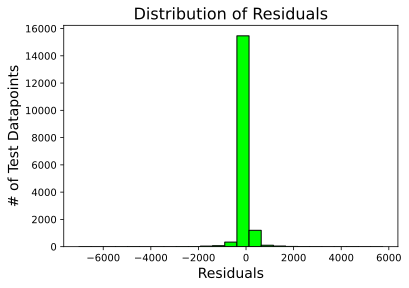

In [36]:
# Calculate the residuals by subtracting the predicted values from the actual test values
all_residuals = test_y - y_pred

# Set up the figure with custom size and resolution (DPI)
plt.figure(figsize=(6, 4), dpi = 150)

# Plot the histogram of residuals
plt.hist(all_residuals, bins = 25, color = 'lime', edgecolor = 'black')

# Label X and Y axes
plt.xlabel('Residuals', fontsize = 14)
plt.ylabel('# of Test Datapoints', fontsize = 14)

# Set the title of the plot
plt.title('Distribution of Residuals', fontsize = 16)

# Adjust the font size of x and y ticks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

plt.savefig("dt_residual_plot.svg")

#### Scatter Plot of Predicted Vs. Actual Values

In [37]:
# Setting the figure size and resolution
plt.figure(figsize = (6, 4), dpi = 150)

# Scatter plot of actual vs predicted values
plt.scatter(test_y, y_pred, color = 'blue', alpha = 0.6, edgecolor = 'black', s = 40)

# 45-degree reference line (perfect predictions)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color = 'red', linestyle = '--', lw = 2)

# Axis labels and title
plt.xlabel('Actual Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10)
plt.title('Predicted vs Actual Values', fontsize = 12)

# Adjust ticks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

plt.savefig("dt_pred_vs_actual.svg")

#### Feature Importance Plot

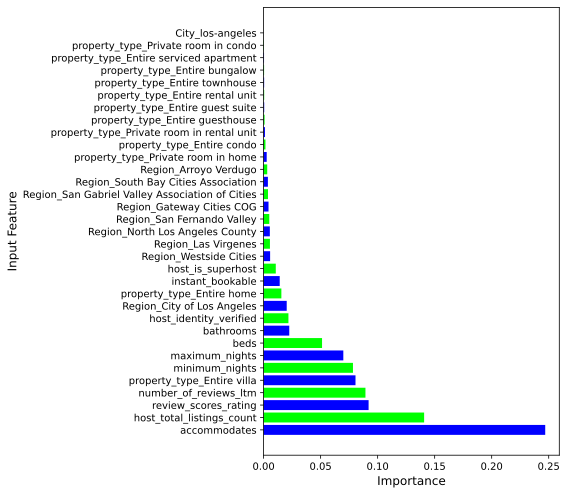

In [38]:
# Storing importance values from the trained model
importance = model.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(8, 7))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['blue', 'lime'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.yticks(fontsize = 10) # fontsize of yticks
plt.xticks(fontsize = 10) # fontsize of xticks

plt.tight_layout();

plt.savefig("dt_feature_imp.svg")

### Prediction Intervals for Regression

In [39]:
# Define MAPIE regressor
mapie = MapieRegressor(estimator = model, # Prediction model to use
                       n_jobs = -1,
                       random_state = 42)

# Fit mapie regressor on training data
start = time.time()  
mapie.fit(train_X, train_y)
stop = time.time()             
print(f"Training time: {stop - start}s")

alpha = 0.1 # For 90% confidence level

Training time: 18.635934114456177s


In [40]:
# Use mapie.predict() to get predicted values and intervals
y_test_pred, y_test_pis = mapie.predict(test_X[:5000], alpha = alpha)

In [41]:
# Storing results in a dataframe
predictions = test_y[:5000].to_frame()
predictions.columns = ['Actual Price']
predictions["Predicted Price"] = y_test_pred.round(2)
predictions["Lower Price Limit"] = y_test_pis[:, 0].round(2)
predictions["Upper Price Limit"] = y_test_pis[:, 1].round(2)

# Take a quick look
predictions.tail(5)

,Actual Price,Predicted Price,Lower Price Limit,Upper Price Limit
3981,55.0,124.0,-153.0,311.0
47888,192.0,199.0,-30.0,456.0
28633,148.0,226.0,-70.0,434.0
55871,110.0,412.0,-100.0,367.0
47448,160.0,136.0,-88.0,376.0


In [42]:
coverage = regression_coverage_score(test_y[:5000],           # Actual values
                                     y_test_pis[:, 0], # Lower bound of prediction intervals
                                     y_test_pis[:, 1]) # Upper bound of prediction intervals

coverage_percentage = coverage * 100
print(f"Coverage: {coverage_percentage:.2f}%")

Coverage: 97.06%


C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mapie\utils.py:620: UserWarning: WARNING: The predictions are ill-sorted.
  warnings.warn(


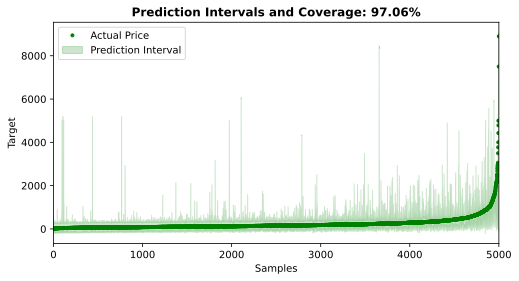

In [43]:
# Sort the predictions by 'Actual Value' for better visualization and reset the index
sorted_predictions = predictions.sort_values(by=['Actual Price']).reset_index(drop=True)

# Create a figure and axis object with specified size and resolution
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the actual values with green dots
plt.plot(sorted_predictions["Actual Price"], 'go', markersize=3, label="Actual Price")

# Fill the area between the lower and upper bounds of the prediction intervals with semi-transparent green color
plt.fill_between(np.arange(len(sorted_predictions)),
                 sorted_predictions["Lower Price Limit"],
                 sorted_predictions["Upper Price Limit"],
                 alpha=0.2, color="green", label="Prediction Interval")

# Set font size for x and y ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set the limit for the x-axis to cover the range of samples
plt.xlim([0, len(sorted_predictions)])

# Label the x-axis and y-axis with appropriate font size
plt.xlabel("Samples", fontsize=10)
plt.ylabel("Target", fontsize=10)

# Add a title to the plot, including the coverage percentage, with bold formatting
plt.title(f"Prediction Intervals and Coverage: {coverage_percentage:.2f}%", fontsize=12, fontweight="bold")

# Add a legend to the plot, placed in the upper left, with specified font size
plt.legend(loc="upper left", fontsize=10);

plt.savefig("dt_coverage.svg")

In [44]:
# Creating the file where we want to write the model
dt_pickle = open('dt_airbnb.pickle', 'wb') 

# Write DT model to the file
pickle.dump(mapie, dt_pickle) 

# Close the file
dt_pickle.close()